In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
from sklearn.model_selection import train_test_split

def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(**kwargs):
    m,X_train,X_valid,y_train, y_valid = [kwargs[x] for x in ['m', 'X_train', 'X_valid', 'y_train', 'y_valid']]
    data = {
            'RMSE_train': [rmse(m.predict(X_train), y_train)],
            'RMSE_valid': [rmse(m.predict(X_valid), y_valid)],
            'score_train': [m.score(X_train, y_train)],
            'score_valid': [m.score(X_valid, y_valid)]
            }
    if hasattr(m, 'oob_score_'): data['score_oob_'] = [m.oob_score_]
    df_score = pd.DataFrame(data)
    display_all(df_score.transpose())

def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

def random_forest(n_estimators=40, n_jobs=-1, min_samples_leaf=1, max_features=0.5, oob_score=True):
    return RandomForestRegressor(n_estimators=n_estimators, n_jobs=n_jobs, min_samples_leaf=min_samples_leaf, max_features=max_features, oob_score=oob_score)

def train_score(df, y, n_estimators=40, n_jobs=-1, min_samples_leaf=1, max_features=0.5, oob_score=True):
    X_train, X_valid, y_train, y_valid = (train_test_split(df, y, test_size=0.2, random_state=42))
#     m = RandomForestRegressor(n_estimators=n_estimators, n_jobs=n_jobs, min_samples_leaf=min_samples_leaf, max_features=max_features, oob_score=oob_score)
    m = random_forest()
    %time m.fit(X_train, y_train)
    print_score(X_train=X_train, X_valid=X_valid, y_train=y_train, y_valid=y_valid, m=m)
    return m

In [4]:
PATH = "data/"
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False)
display_all(df_raw.transpose())
df_raw.SalePrice = np.log(df_raw.SalePrice)
train_cats(df_raw)

0        1        2        3        4        5        6     \
Id                   1        2        3        4        5        6        7   
MSSubClass          60       20       60       70       60       50       20   
MSZoning            RL       RL       RL       RL       RL       RL       RL   
LotFrontage         65       80       68       60       84       85       75   
LotArea           8450     9600    11250     9550    14260    14115    10084   
Street            Pave     Pave     Pave     Pave     Pave     Pave     Pave   
Alley              NaN      NaN      NaN      NaN      NaN      NaN      NaN   
LotShape           Reg      Reg      IR1      IR1      IR1      IR1      Reg   
LandContour        Lvl      Lvl      Lvl      Lvl      Lvl      Lvl      Lvl   
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub   AllPub   AllPub   
LotConfig       Inside      FR2   Inside   Corner      FR2   Inside   Inside   
LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl      Gtl      Gtl   
Neighborhood   CollgCr  Veenker  CollgCr  Crawfor  NoRidge  Mitchel  Somerst   
Condition1        Norm    Feedr     Norm     Norm     Norm     Norm     Norm   
Condition2        Norm     Norm     Norm     Norm     Norm     Norm     Norm   
BldgType          1Fam     1Fam     1Fam     1Fam     1Fam     1Fam     1Fam   
HouseStyle      2Story   1Story   2Story   2Story   2Story   1.5Fin   1Story   
OverallQual          7        6        7        7        8        5        8   
OverallCond          5        8        5        5        5        5        5   
YearBuilt         2003     1976     2001     1915     2000     1993     2004   
YearRemodAdd      2003     1976     2002     1970     2000     1995     2005   
RoofStyle        Gable    Gable    Gable    Gable    Gable    Gable    Gable   
RoofMatl       CompShg  CompShg  CompShg  CompShg  CompShg  CompShg  CompShg   
Exterior1st    VinylSd  MetalSd  VinylSd  Wd Sdng  VinylSd  VinylSd  VinylSd   
Exterior2nd    VinylSd  MetalSd  VinylSd  Wd Shng  VinylSd  VinylSd  VinylSd   
MasVnrType     BrkFace     None  BrkFace     None  BrkFace     None    Stone   
MasVnrArea         196        0      162        0      350        0      186   
ExterQual           Gd       TA       Gd       TA       Gd       TA       Gd   
ExterCond           TA       TA       TA       TA       TA       TA       TA   
Foundation       PConc   CBlock    PConc   BrkTil    PConc     Wood    PConc   
BsmtQual            Gd       Gd       Gd       TA       Gd       Gd       Ex   
BsmtCond            TA       TA       TA       Gd       TA       TA       TA   
BsmtExposure        No       Gd       Mn       No       Av       No       Av   
BsmtFinType1       GLQ      ALQ      GLQ      ALQ      GLQ      GLQ      GLQ   
BsmtFinSF1         706      978      486      216      655      732     1369   
BsmtFinType2       Unf      Unf      Unf      Unf      Unf      Unf      Unf   
BsmtFinSF2           0        0        0        0        0        0        0   
BsmtUnfSF          150      284      434      540      490       64      317   
TotalBsmtSF        856     1262      920      756     1145      796     1686   
Heating           GasA     GasA     GasA     GasA     GasA     GasA     GasA   
HeatingQC           Ex       Ex       Ex       Gd       Ex       Ex       Ex   
CentralAir           Y        Y        Y        Y        Y        Y        Y   
Electrical       SBrkr    SBrkr    SBrkr    SBrkr    SBrkr    SBrkr    SBrkr   
1stFlrSF           856     1262      920      961     1145      796     1694   
2ndFlrSF           854        0      866      756     1053      566        0   
LowQualFinSF         0        0        0        0        0        0        0   
GrLivArea         1710     1262     1786     1717     2198     1362     1694   
BsmtFullBath         1        0        1        1        1        1        1   
BsmtHalfBath         0        1        0        0        0        0        0   
FullBath          

In [6]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [7]:
m = train_score(df, y)

CPU times: user 459 ms, sys: 10.4 ms, total: 469 ms
Wall time: 142 ms


0
RMSE_train   0.053472
RMSE_valid   0.145631
score_train  0.981244
score_valid  0.886351
score_oob_   0.859888

In [106]:
??m.fit

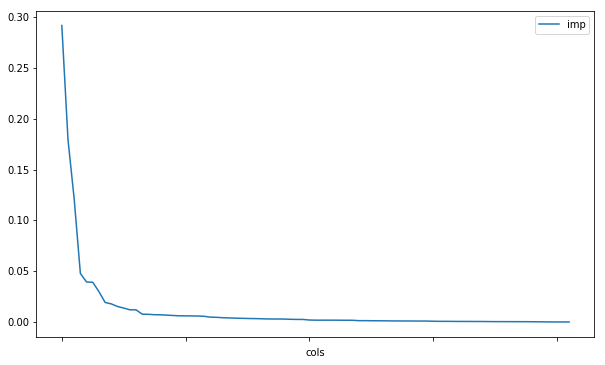

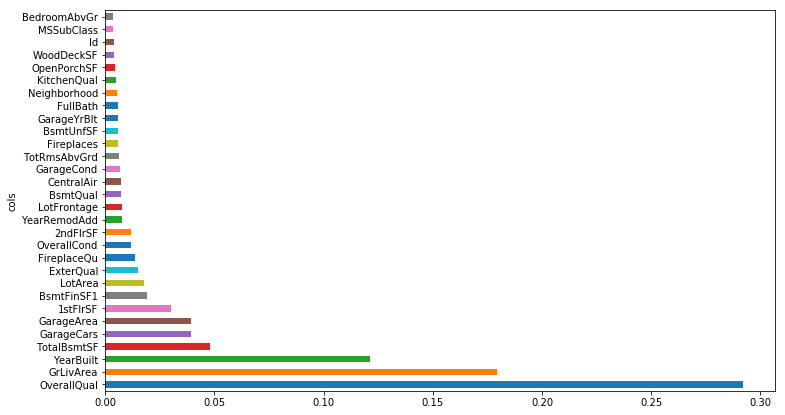

In [8]:
fi = rf_feat_importance(m, df)
fi.plot('cols', 'imp', figsize=(10,6), legend=True);
plot_fi(fi[:30]);

CPU times: user 258 ms, sys: 17.9 ms, total: 276 ms
Wall time: 133 ms


0
RMSE_train   0.053014
RMSE_valid   0.151953
score_train  0.981564
score_valid  0.876269
score_oob_   0.863815

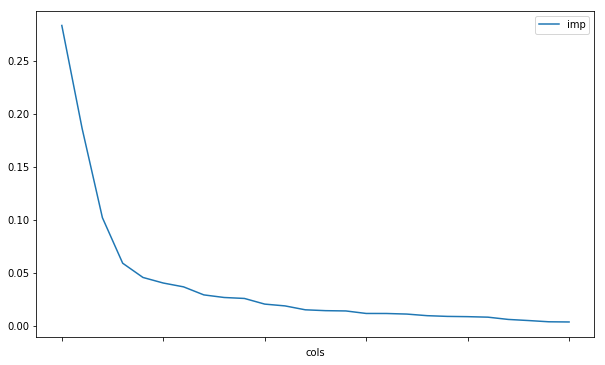

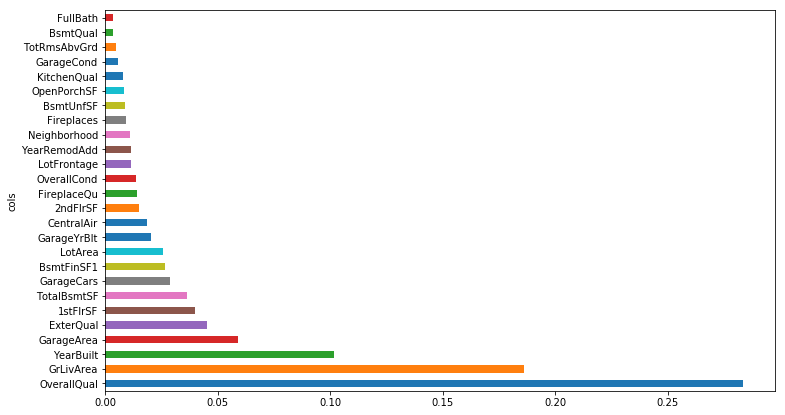

In [9]:
to_keep = fi[fi.imp>0.0042].cols
df_keep = df[to_keep].copy()
m = train_score(df_keep, y)
fi = rf_feat_importance(m, df_keep)
fi.plot('cols', 'imp', figsize=(10,6), legend=True);
plot_fi(fi[:30]);

## One Hot Encoding

CPU times: user 676 ms, sys: 7.27 ms, total: 684 ms
Wall time: 157 ms


0
RMSE_train   0.053961
RMSE_valid   0.146543
score_train  0.980899
score_valid  0.884924
score_oob_   0.858609

CPU times: user 262 ms, sys: 20.3 ms, total: 283 ms
Wall time: 139 ms


0
RMSE_train   0.055417
RMSE_valid   0.148800
score_train  0.979855
score_valid  0.881352
score_oob_   0.861343

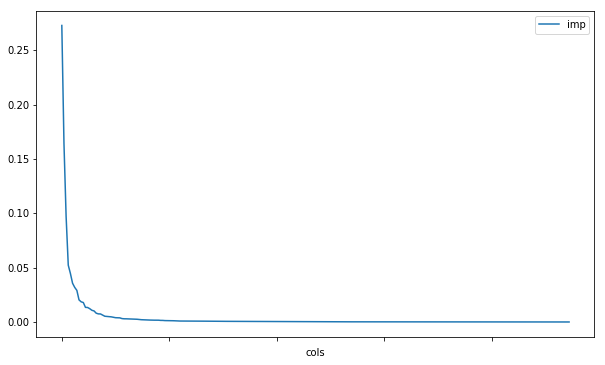

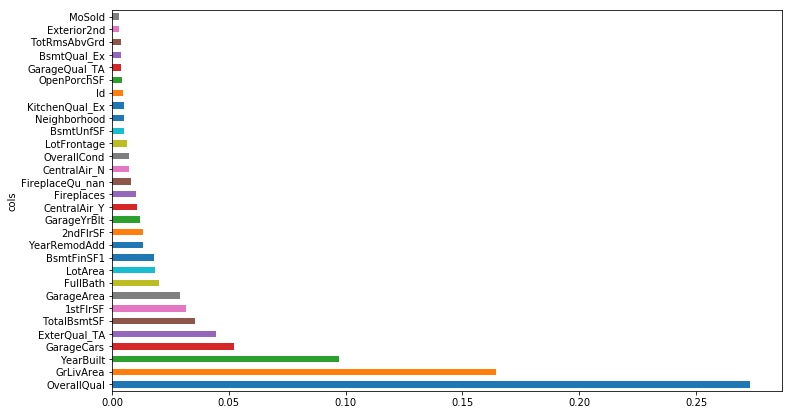

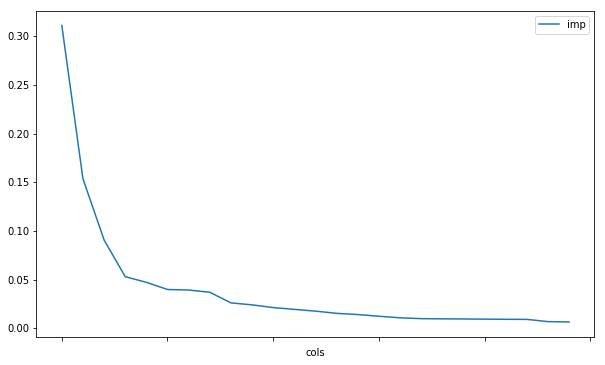

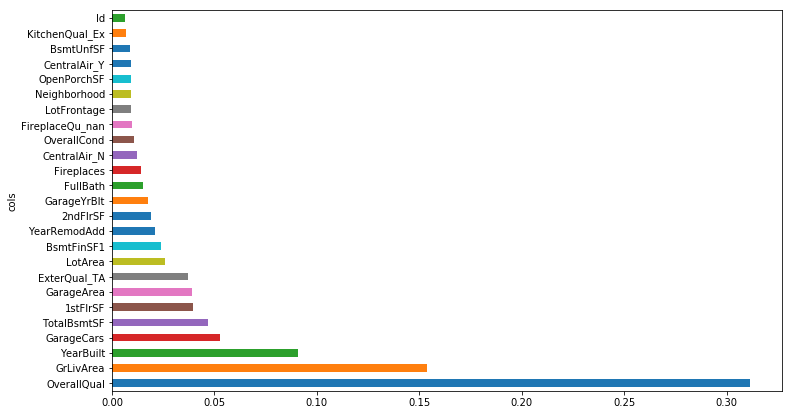

In [10]:
def ohe_fi(df_raw):    
    df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7) #one hot encoding
    m = train_score(df_trn, y_trn)
    fi = rf_feat_importance(m, df_trn)
    fi.plot('cols', 'imp', figsize=(10,6), legend=True);
    plot_fi(fi[:30]);
    
    to_keep_ohe = fi[fi.imp>0.0042].cols
    df_keep_ohe = df_trn[to_keep_ohe].copy()
    m = train_score(df_keep_ohe, y_trn)
    fi = rf_feat_importance(m, df_keep_ohe)
    fi.plot('cols', 'imp', figsize=(10,6), legend=True);
    plot_fi(fi[:30]);
    return df_keep_ohe

df_keep = ohe_fi(df_raw)

## Removing redundant features with Rank Correlation

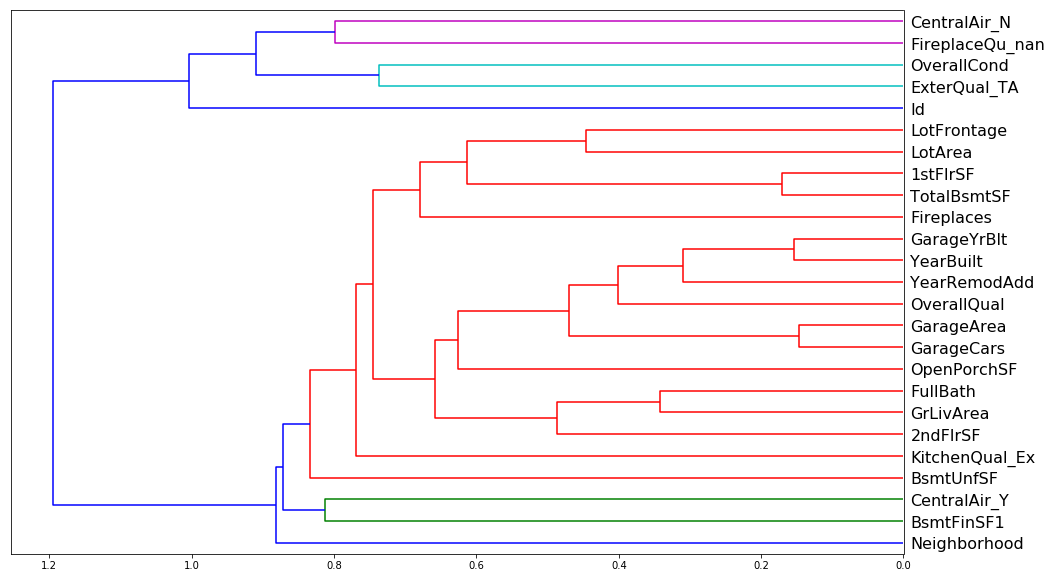

In [11]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [14]:
def get_oob(df, y):
    m = random_forest()
    X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2, random_state=42)
#    x, _ = split_vals(df, n_trn)
    m.fit(X_train, y_train)
    return m.oob_score_

print(get_oob(df_keep, y))

for c in ('GarageArea', 'GarageCars', '1stFlrSF', 'TotalBsmtSF'):
    print(c, get_oob(df_keep.drop(c, axis=1), y))

0.8607835779322521
GarageArea 0.8687521744324791
GarageCars 0.8722901043600962
1stFlrSF 0.8613250019239176
TotalBsmtSF 0.8692794306996501


Drop one from each group

In [15]:
to_drop = ['GarageArea', '1stFlrSF']
get_oob(df_keep.drop(to_drop, axis=1),y)

0.8623737151127079

Looks good so we can drop these columns from the dataset

In [16]:
df_keep.drop(to_drop, axis=1, inplace=True)

In [65]:
??aes

## Partial Dependence

[Details about this here](https://youtu.be/0v93qHDqq_g?t=4480)

CPU times: user 229 ms, sys: 21.4 ms, total: 251 ms
Wall time: 137 ms


0
RMSE_train   0.055566
RMSE_valid   0.147742
score_train  0.979746
score_valid  0.883032
score_oob_   0.858257

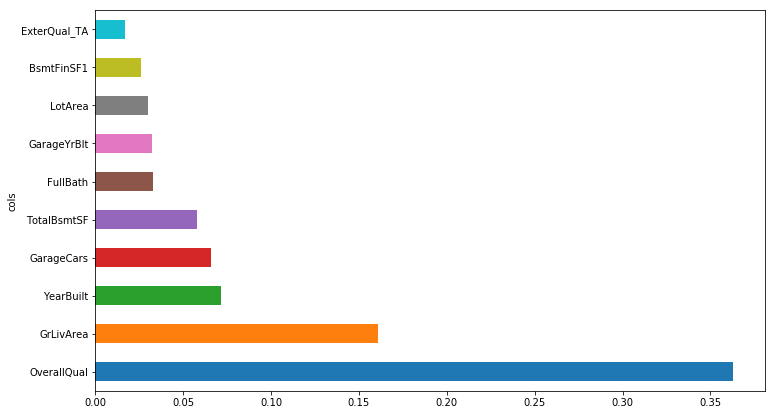

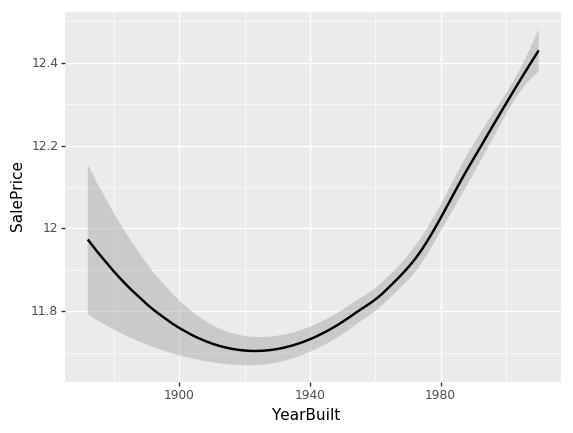

<ggplot: (-9223372029303173870)>

In [17]:
from pdpbox import pdp
from plotnine import *

m = train_score(df_keep, y)
plot_fi(rf_feat_importance(m, df_keep)[:10]);

def plot_sale_price(df, x):
#     x_all = get_sample(df, 500)
    x_all = df
    #return ggplot(x_all, aes('GrLivArea', 'SalePrice'))+stat_smooth(se=True, method='loess')
    return ggplot(x_all, aes(x, 'SalePrice'))+stat_smooth(se=True, method='loess')
    
plot_sale_price(df_raw,'YearBuilt')
# plot_sale_price(df_raw,'LotArea')
#df_raw.plot('LotArea', 'GrLivArea', 'scatter', alpha=0.01, figsize=(10,8));

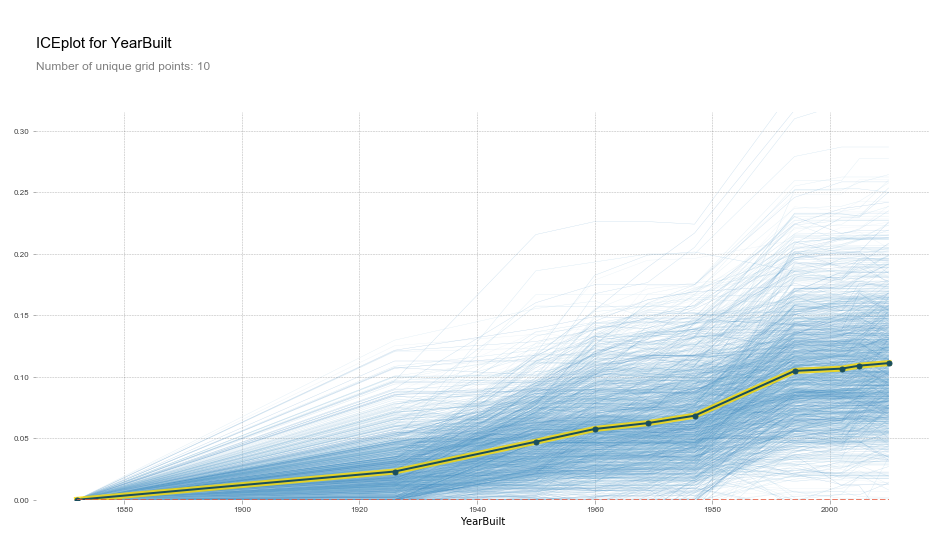

In [18]:
def plot_pdp(m, df, feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, df, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, n_cluster_centers=clusters)
plot_pdp(m,df_keep, 'YearBuilt')

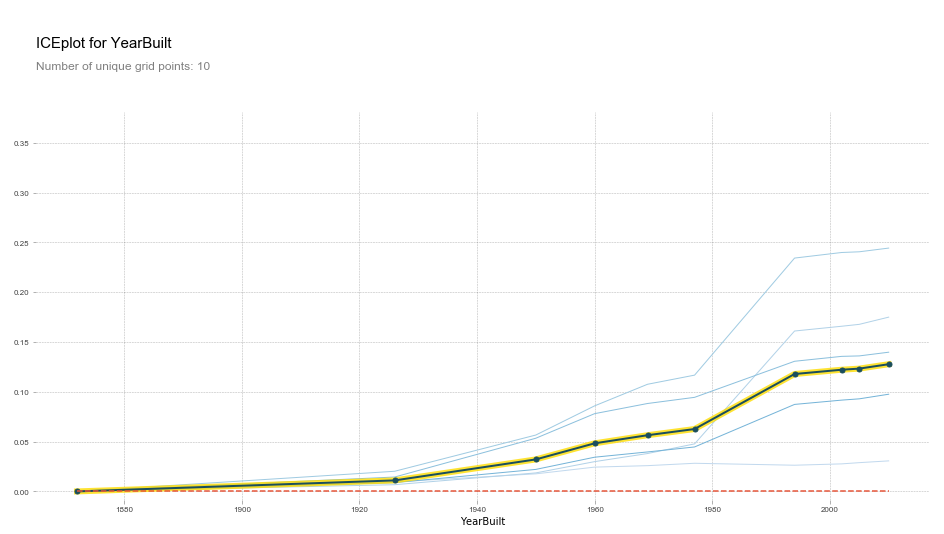

In [84]:
plot_pdp(m,df_keep, 'YearBuilt', clusters=5)

### Interaction plot
Plot the effect of a [combination of features](https://youtu.be/0v93qHDqq_g?t=5258) on sale price.

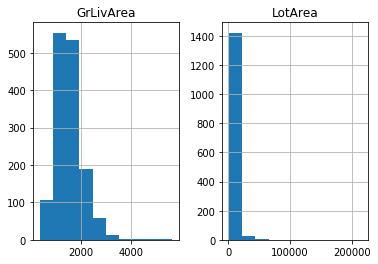

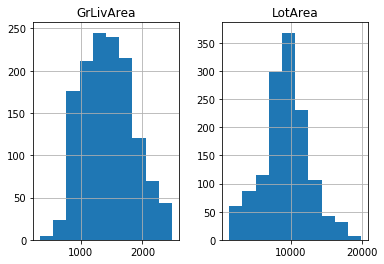

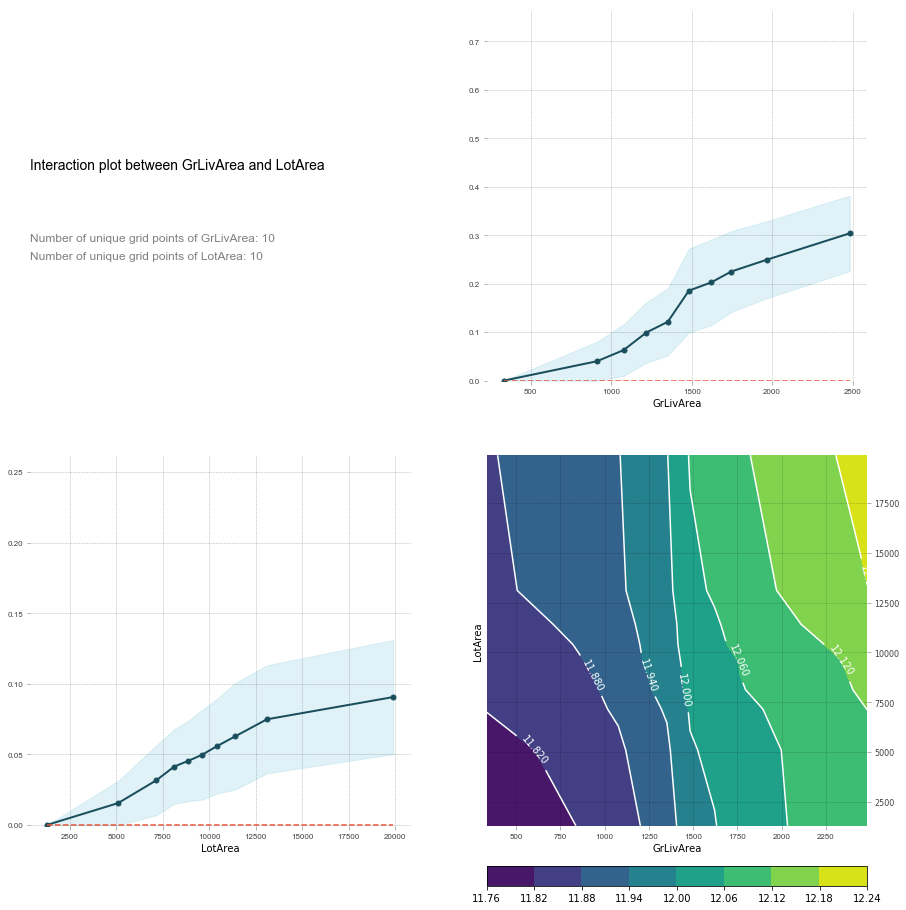

In [105]:
def interaction_plot(m, df, feats):
    p = pdp.pdp_interact(m, df, feats)
    return pdp.pdp_interact_plot(p, feats)

#Histogram shows some outliers for GrLivArea & LotArea
df_keep.hist(column=['GrLivArea','LotArea'])
df_keep[(df_keep.GrLivArea < 2500) & (df_keep.LotArea < 20000)].hist(column=['GrLivArea','LotArea'])

interaction_plot(m, df_keep[(df_keep.GrLivArea < 2500) & (df_keep.LotArea < 20000)], ['GrLivArea', 'LotArea'])
#interaction_plot(m, df_keep, ['GrLivArea', 'LotArea'])